In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')
from plotnine import *
import folium
from folium.plugins import MiniMap
from geopy.geocoders import Nominatim
import time
import requests

In [2]:
house = pd.read_csv('./data/아파트 실거래가.csv')
house

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,등기일자,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,"220,000",4,1987,언주로 3,NaN,,중개거래,서울 강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,"220,000",2,1987,언주로 3,NaN,,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,"216,000",2,1987,언주로 3,NaN,,중개거래,서울 강남구
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,"369,000",13,2020,개포로 264,NaN,,중개거래,"서울 강남구, 서울 양천구"
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2,"420,000",17,2020,개포로 264,NaN,,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202203,27,"73,000",20,1997,동일로 752,NaN,,중개거래,서울 중랑구
12681,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,"74,000",3,1997,동일로 752,NaN,,중개거래,서울 중랑구
12682,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,"91,500",12,1997,동일로 752,NaN,,중개거래,서울 중랑구
12683,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,"49,900",7,2003,동일로144길 74,NaN,,중개거래,서울 중랑구


In [3]:
house.drop(['번지', '본번', '부번', '층', '계약년월', '계약일' , '층',  '해제사유발생일', '등기일자', '거래유형', '중개사소재지'] ,axis=1, inplace=True)
house.columns

Index(['시군구', '단지명', '전용면적(㎡)', '거래금액(만원)', '건축년도', '도로명'], dtype='object')

In [4]:
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"216,000",1987,언주로 3
3,서울특별시 강남구 개포동,개포래미안포레스트,102.32,"369,000",2020,개포로 264
4,서울특별시 강남구 개포동,개포래미안포레스트,136.06,"420,000",2020,개포로 264
...,...,...,...,...,...,...
12680,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,"73,000",1997,동일로 752
12681,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,"74,000",1997,동일로 752
12682,서울특별시 중랑구 중화동,한신아파트(103~109),84.03,"91,500",1997,동일로 752
12683,서울특별시 중랑구 중화동,한영(101),84.69,"49,900",2003,동일로144길 74


In [5]:
house.to_csv('./아파트실거래가전처리.csv')
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"216,000",1987,언주로 3
3,서울특별시 강남구 개포동,개포래미안포레스트,102.32,"369,000",2020,개포로 264
4,서울특별시 강남구 개포동,개포래미안포레스트,136.06,"420,000",2020,개포로 264
...,...,...,...,...,...,...
12680,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,"73,000",1997,동일로 752
12681,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,"74,000",1997,동일로 752
12682,서울특별시 중랑구 중화동,한신아파트(103~109),84.03,"91,500",1997,동일로 752
12683,서울특별시 중랑구 중화동,한영(101),84.69,"49,900",2003,동일로144길 74


In [6]:
for index, row in house.iterrows():
    address = row['시군구']
    parts = address.split(' ')  # 공백으로 문자열 분할
    if len(parts) > 2:
        # 3번째 인덱스를 법정동으로 설정
        house.at[index, '법정동'] = parts[2]

house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,도로명,법정동
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3,개포동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3,개포동
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,"216,000",1987,언주로 3,개포동
3,서울특별시 강남구 개포동,개포래미안포레스트,102.32,"369,000",2020,개포로 264,개포동
4,서울특별시 강남구 개포동,개포래미안포레스트,136.06,"420,000",2020,개포로 264,개포동
...,...,...,...,...,...,...,...
12680,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,"73,000",1997,동일로 752,중화동
12681,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,"74,000",1997,동일로 752,중화동
12682,서울특별시 중랑구 중화동,한신아파트(103~109),84.03,"91,500",1997,동일로 752,중화동
12683,서울특별시 중랑구 중화동,한영(101),84.69,"49,900",2003,동일로144길 74,중화동


In [8]:
for index, row in house.iterrows():
    address = row['시군구']
    parts = address.split(' ')  # 공백으로 문자열 분할
    if len(parts) > 2:
        # 3번째 인덱스를 법정동으로 설정
        house.at[index, '시군구'] = parts[1]

house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,도로명,법정동
0,강남구,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3,개포동
1,강남구,개포6차우성아파트1동~8동,79.97,"220,000",1987,언주로 3,개포동
2,강남구,개포6차우성아파트1동~8동,79.97,"216,000",1987,언주로 3,개포동
3,강남구,개포래미안포레스트,102.32,"369,000",2020,개포로 264,개포동
4,강남구,개포래미안포레스트,136.06,"420,000",2020,개포로 264,개포동
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.76,"73,000",1997,동일로 752,중화동
12681,중랑구,한신아파트(103~109),59.76,"74,000",1997,동일로 752,중화동
12682,중랑구,한신아파트(103~109),84.03,"91,500",1997,동일로 752,중화동
12683,중랑구,한영(101),84.69,"49,900",2003,동일로144길 74,중화동


In [9]:
house['거래금액(만원)'] = house['거래금액(만원)'].str.replace(',', '', regex=True)
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,도로명,법정동
0,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,언주로 3,개포동
1,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,언주로 3,개포동
2,강남구,개포6차우성아파트1동~8동,79.97,216000,1987,언주로 3,개포동
3,강남구,개포래미안포레스트,102.32,369000,2020,개포로 264,개포동
4,강남구,개포래미안포레스트,136.06,420000,2020,개포로 264,개포동
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.76,73000,1997,동일로 752,중화동
12681,중랑구,한신아파트(103~109),59.76,74000,1997,동일로 752,중화동
12682,중랑구,한신아파트(103~109),84.03,91500,1997,동일로 752,중화동
12683,중랑구,한영(101),84.69,49900,2003,동일로144길 74,중화동


In [10]:
house['면적(㎡)당금액'] = (house['거래금액(만원)'].astype(int) / house['전용면적(㎡)'].astype(int)).round()
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,도로명,법정동,면적(㎡)당금액
0,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,언주로 3,개포동,2785.0
1,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,언주로 3,개포동,2785.0
2,강남구,개포6차우성아파트1동~8동,79.97,216000,1987,언주로 3,개포동,2734.0
3,강남구,개포래미안포레스트,102.32,369000,2020,개포로 264,개포동,3618.0
4,강남구,개포래미안포레스트,136.06,420000,2020,개포로 264,개포동,3088.0
...,...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.76,73000,1997,동일로 752,중화동,1237.0
12681,중랑구,한신아파트(103~109),59.76,74000,1997,동일로 752,중화동,1254.0
12682,중랑구,한신아파트(103~109),84.03,91500,1997,동일로 752,중화동,1089.0
12683,중랑구,한영(101),84.69,49900,2003,동일로144길 74,중화동,594.0


In [11]:
house.drop(['도로명'] ,axis=1, inplace=True)
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
0,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,개포동,2785.0
1,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,개포동,2785.0
2,강남구,개포6차우성아파트1동~8동,79.97,216000,1987,개포동,2734.0
3,강남구,개포래미안포레스트,102.32,369000,2020,개포동,3618.0
4,강남구,개포래미안포레스트,136.06,420000,2020,개포동,3088.0
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.76,73000,1997,중화동,1237.0
12681,중랑구,한신아파트(103~109),59.76,74000,1997,중화동,1254.0
12682,중랑구,한신아파트(103~109),84.03,91500,1997,중화동,1089.0
12683,중랑구,한영(101),84.69,49900,2003,중화동,594.0


In [12]:
house.to_csv('./data/아파트실거래가(2).csv')
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
0,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,개포동,2785.0
1,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,개포동,2785.0
2,강남구,개포6차우성아파트1동~8동,79.97,216000,1987,개포동,2734.0
3,강남구,개포래미안포레스트,102.32,369000,2020,개포동,3618.0
4,강남구,개포래미안포레스트,136.06,420000,2020,개포동,3088.0
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.76,73000,1997,중화동,1237.0
12681,중랑구,한신아파트(103~109),59.76,74000,1997,중화동,1254.0
12682,중랑구,한신아파트(103~109),84.03,91500,1997,중화동,1089.0
12683,중랑구,한영(101),84.69,49900,2003,중화동,594.0


In [14]:
house = pd.read_csv('./data/아파트실거래가(2).csv')
house.drop(columns=('Unnamed: 0'), inplace=True)
house

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
0,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,개포동,2785.0
1,강남구,개포6차우성아파트1동~8동,79.97,220000,1987,개포동,2785.0
2,강남구,개포6차우성아파트1동~8동,79.97,216000,1987,개포동,2734.0
3,강남구,개포래미안포레스트,102.32,369000,2020,개포동,3618.0
4,강남구,개포래미안포레스트,136.06,420000,2020,개포동,3088.0
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.76,73000,1997,중화동,1237.0
12681,중랑구,한신아파트(103~109),59.76,74000,1997,중화동,1254.0
12682,중랑구,한신아파트(103~109),84.03,91500,1997,중화동,1089.0
12683,중랑구,한영(101),84.69,49900,2003,중화동,594.0


In [15]:
house[house['법정동'] == '성북동']

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
8795,성북구,주암,48.73,27000,1972,성북동,562.0


In [17]:
# '시군구' 열에서 데이터의 빈도를 계산합니다.
house_count = house['법정동'].value_counts()
house_count

상계동      370
구로동      345
서초동      285
화곡동      272
상봉동      231
        ... 
연지동        1
이화동        1
인의동        1
보문동2가      1
홍익동        1
Name: 법정동, Length: 297, dtype: int64

In [20]:
# 값이 1인 인덱스를 선택합니다.
house_count_1 = house_alone.index[house_alone == 1]

# 결과를 출력합니다.
house_count_1

Index(['장충동2가', '동소문동4가', '동선동1가', '을지로5가', '율현동', '세곡동', '동선동4가', '동숭동',
       '남대문로5가', '성북동1가', '토정동', '하중동', '동교동', '삼전동', '영천동', '청암동', '충정로2가',
       '합동', '안암동1가', '성북동', '동소문동7가', '삼선동5가', '누상동', '삼선동4가', '신영동', '보문동4가',
       '연지동', '이화동', '인의동', '보문동2가', '홍익동'],
      dtype='object')

In [40]:
# Series를 DataFrame으로 변환합니다.
df = pd.DataFrame({'Column_Name': house_aloned})

# 결과를 출력합니다.
df

,Column_Name
0,1
1,2
2,3
3,1
4,4
5,1
6,5
7,6
8,7
9,1


In [38]:
import pandas as pd

# house_aloned라는 이름의 Pandas Series를 가정합니다.
# 이 시리즈는 데이터 값이 1인 것을 추출하고 싶습니다.
house_aloned = pd.Series([1, 2, 3, 1, 4, 1, 5, 6, 7, 1])

# 데이터 값이 1인 항목을 추출합니다.
result = house_aloned[house_aloned == 1]

# 결과를 출력합니다.
print(result)


0    1
3    1
5    1
9    1
dtype: int64


In [24]:
house_small = house[house['전용면적(㎡)'] < 30]
house_small

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
76,강남구,더원센트럴,26.96,49500,2018,논현동,1904.0
130,강남구,한양수자인어반게이트,16.20,21200,2013,논현동,1325.0
131,강남구,한양수자인어반게이트,16.20,20500,2013,논현동,1281.0
132,강남구,한양수자인어반게이트,16.20,22000,2013,논현동,1375.0
133,강남구,한양수자인어반게이트,20.70,22300,2013,논현동,1115.0
...,...,...,...,...,...,...,...
12668,중랑구,범양프레체,17.94,11800,2012,중화동,694.0
12669,중랑구,범양프레체,17.94,11400,2012,중화동,671.0
12670,중랑구,범양프레체,17.94,11300,2012,중화동,665.0
12671,중랑구,범양프레체,17.94,11400,2012,중화동,671.0


In [25]:
house_small[house_small['시군구'].str.contains('성북구')]

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
8729,성북구,성신여대역솔하임,14.022,20900,2018,동소문동5가,1493.0
8730,성북구,성신여대역솔하임,14.022,20000,2018,동소문동5가,1429.0
8731,성북구,성신여대역솔하임,15.424,23000,2018,동소문동5가,1533.0
8796,성북구,휴아름스튜디오,16.270,22000,2015,성북동1가,1375.0
8810,성북구,(160-16),22.720,11300,2017,안암동5가,514.0
...,...,...,...,...,...,...,...
9059,성북구,삼전솔하임3차,15.620,12000,2013,하월곡동,800.0
9060,성북구,삼전솔하임3차,15.620,11700,2013,하월곡동,780.0
9061,성북구,삼전솔하임3차,15.620,12000,2013,하월곡동,800.0
9062,성북구,삼전솔하임3차,15.620,10600,2013,하월곡동,707.0


In [37]:
# 빈도가 1인 값을 필터링합니다.
result = house_aloned[house_aloned == 1]
result

NameError: name 'house_aloned' is not defined

In [26]:
house_dangi = house.groupby(['시군구', '법정동', '단지명', '건축년도'])['면적(㎡)당금액'].mean().round().reset_index()
house_dangi

,시군구,법정동,단지명,건축년도,면적(㎡)당금액
0,강남구,개포동,개포6차우성아파트1동~8동,1987,2768.0
1,강남구,개포동,개포래미안포레스트,2020,3248.0
2,강남구,개포동,개포자이,2004,1623.0
3,강남구,개포동,개포주공6단지,1983,3120.0
4,강남구,개포동,개포주공7단지,1983,3810.0
...,...,...,...,...,...
3690,중랑구,중화동,태능에셈빌,2005,881.0
3691,중랑구,중화동,한솔e(A동),2004,617.0
3692,중랑구,중화동,한신아파트(103~109),1997,1193.0
3693,중랑구,중화동,한영(101),2003,594.0


In [27]:
house_dangi_mean = house_dangi.groupby(['시군구'])['면적(㎡)당금액'].mean().round().reset_index()
house_dangi_mean

,시군구,면적(㎡)당금액
0,강남구,2246.0
1,강동구,1171.0
2,강북구,819.0
3,강서구,957.0
4,관악구,984.0
5,광진구,1361.0
6,구로구,828.0
7,금천구,848.0
8,노원구,1022.0
9,도봉구,784.0


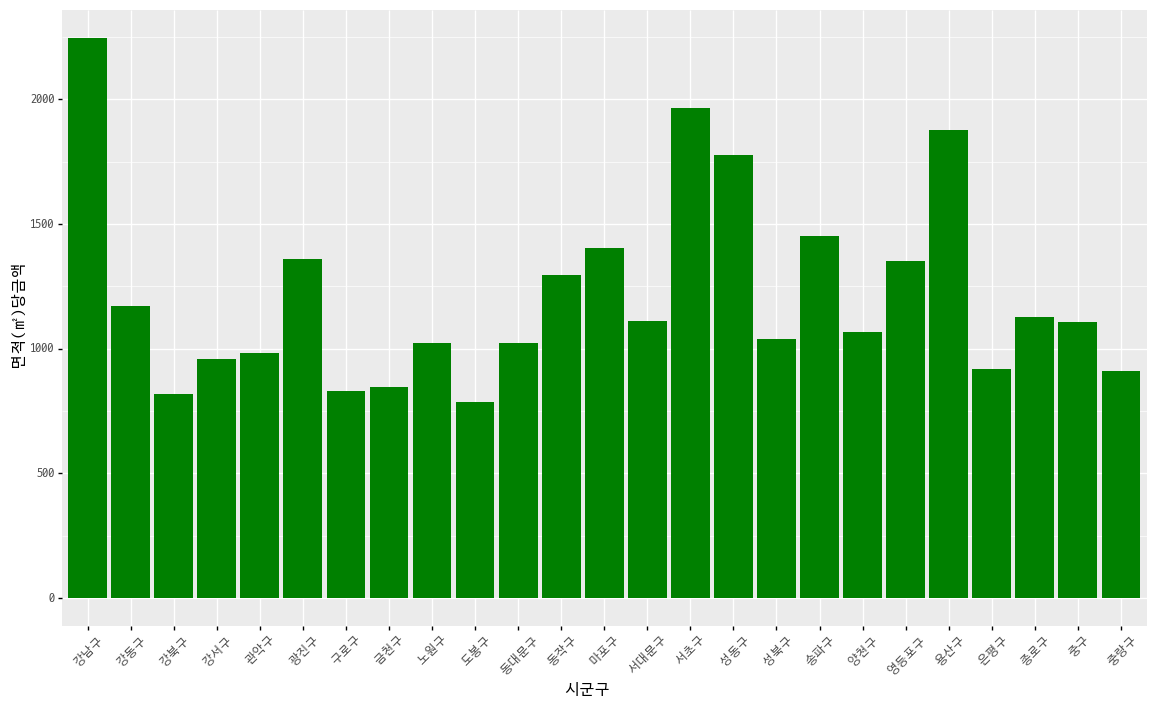

<ggplot: (-9223371885690290824)>

In [28]:
(
    ggplot(house_dangi_mean, aes(x='시군구', y='면적(㎡)당금액'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='D2Coding'), figure_size=(14, 8), 
                axis_text_x=element_text(rotation=45))
)

In [ ]:
# 동북부 

In [58]:
house_dangi_dongbuk = house[(house['시군구'] == '강북구') | (house['시군구'] == '도봉구') | (house['시군구'] == '노원구')| (house['시군구'] == '중랑구')
                            | (house['시군구'] == '성북구')| (house['시군구'] == '동대문구')]
house_dangi_dongbuk

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
1372,강북구,경남아너스빌(1356-0),114.922,89000,2003,미아동,781.0
1373,강북구,경남아너스빌(1356-0),59.964,77000,2003,미아동,1305.0
1374,강북구,경남아너스빌(1356-0),84.873,85000,2003,미아동,1012.0
1375,강북구,꿈의숲롯데캐슬,84.980,113000,2017,미아동,1345.0
1376,강북구,꿈의숲롯데캐슬,104.530,117000,2017,미아동,1125.0
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.760,73000,1997,중화동,1237.0
12681,중랑구,한신아파트(103~109),59.760,74000,1997,중화동,1254.0
12682,중랑구,한신아파트(103~109),84.030,91500,1997,중화동,1089.0
12683,중랑구,한영(101),84.690,49900,2003,중화동,594.0


In [60]:
df = house_dangi_dongbuk[house_dangi_dongbuk['법정동'] == '돈암동']
df

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
8663,성북구,길음역금호어울림센터힐,59.50,94000,2014,돈암동,1593.0
8664,성북구,대성유니드(641-0),84.93,80800,2009,돈암동,962.0
8665,성북구,돈암동 풍림아파트 101~105동,59.64,67000,1999,돈암동,1136.0
8666,성북구,돈암동 풍림아파트 101~105동,59.64,66000,1999,돈암동,1119.0
8667,성북구,돈암동 풍림아파트 101~105동,84.68,76000,1999,돈암동,905.0
...,...,...,...,...,...,...,...
8719,성북구,한진(609-1),132.96,90000,1998,돈암동,682.0
8720,성북구,한진(609-1),84.87,73000,1998,돈암동,869.0
8721,성북구,한진(609-1),59.58,51000,1998,돈암동,864.0
8722,성북구,한진(609-1),59.58,52000,1998,돈암동,881.0


In [63]:
# 숫자 + '가'가 들어가는 법정동을 '시가지동'으로 변경
house_dangi_dongbuk['법정동'] = house_dangi_dongbuk['법정동'].apply(lambda x: '시가지동' if x.endswith('가')  or x == '돈암동' else x)

# 변경된 데이터프레임 출력
house_dangi_dongbuk

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
1372,강북구,경남아너스빌(1356-0),114.922,89000,2003,미아동,781.0
1373,강북구,경남아너스빌(1356-0),59.964,77000,2003,미아동,1305.0
1374,강북구,경남아너스빌(1356-0),84.873,85000,2003,미아동,1012.0
1375,강북구,꿈의숲롯데캐슬,84.980,113000,2017,미아동,1345.0
1376,강북구,꿈의숲롯데캐슬,104.530,117000,2017,미아동,1125.0
...,...,...,...,...,...,...,...
12680,중랑구,한신아파트(103~109),59.760,73000,1997,중화동,1237.0
12681,중랑구,한신아파트(103~109),59.760,74000,1997,중화동,1254.0
12682,중랑구,한신아파트(103~109),84.030,91500,1997,중화동,1089.0
12683,중랑구,한영(101),84.690,49900,2003,중화동,594.0


In [65]:
house_dangi_nowon = house_dangi_dongbuk[house_dangi_dongbuk['법정동']== '시가지동']
house_dangi_nowon

,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,법정동,면적(㎡)당금액
8663,성북구,길음역금호어울림센터힐,59.50,94000,2014,시가지동,1593.0
8664,성북구,대성유니드(641-0),84.93,80800,2009,시가지동,962.0
8665,성북구,돈암동 풍림아파트 101~105동,59.64,67000,1999,시가지동,1136.0
8666,성북구,돈암동 풍림아파트 101~105동,59.64,66000,1999,시가지동,1119.0
8667,성북구,돈암동 풍림아파트 101~105동,84.68,76000,1999,시가지동,905.0
...,...,...,...,...,...,...,...
8812,성북구,(160-16),22.72,11300,2017,시가지동,514.0
8813,성북구,(160-16),22.72,11300,2017,시가지동,514.0
8814,성북구,(160-16),22.72,11300,2017,시가지동,514.0
8815,성북구,(160-16),22.72,11300,2017,시가지동,514.0


In [54]:
df_mean = house_dangi_dongbuk.groupby(['시군구', '법정동'])['면적(㎡)당금액'].mean().round().reset_index()
df_mean

,시군구,법정동,면적(㎡)당금액
0,강북구,미아동,990.0
1,강북구,번동,922.0
2,강북구,수유동,965.0
3,강북구,우이동,755.0
4,노원구,공릉동,1016.0
5,노원구,상계동,1115.0
6,노원구,월계동,1213.0
7,노원구,중계동,1169.0
8,노원구,하계동,1222.0
9,도봉구,도봉동,784.0


In [55]:
df_mean.to_csv('./data/동북부집값.csv')
df_mean

,시군구,법정동,면적(㎡)당금액
0,강북구,미아동,990.0
1,강북구,번동,922.0
2,강북구,수유동,965.0
3,강북구,우이동,755.0
4,노원구,공릉동,1016.0
5,노원구,상계동,1115.0
6,노원구,월계동,1213.0
7,노원구,중계동,1169.0
8,노원구,하계동,1222.0
9,도봉구,도봉동,784.0
